# 1) Data Preprocessing:
1.	Preprocess the dataset to handle missing values, remove outliers, and scale the features if necessary.
2.	Perform exploratory data analysis (EDA) to gain insights into the distribution of data and identify potential clusters.
3.	Use multiple visualizations to understand the hidden patterns in the datast


In [1]:
import pandas as pd
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name = 1)
df.shape

(3999, 12)

In [2]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [5]:
# checing missing values

df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

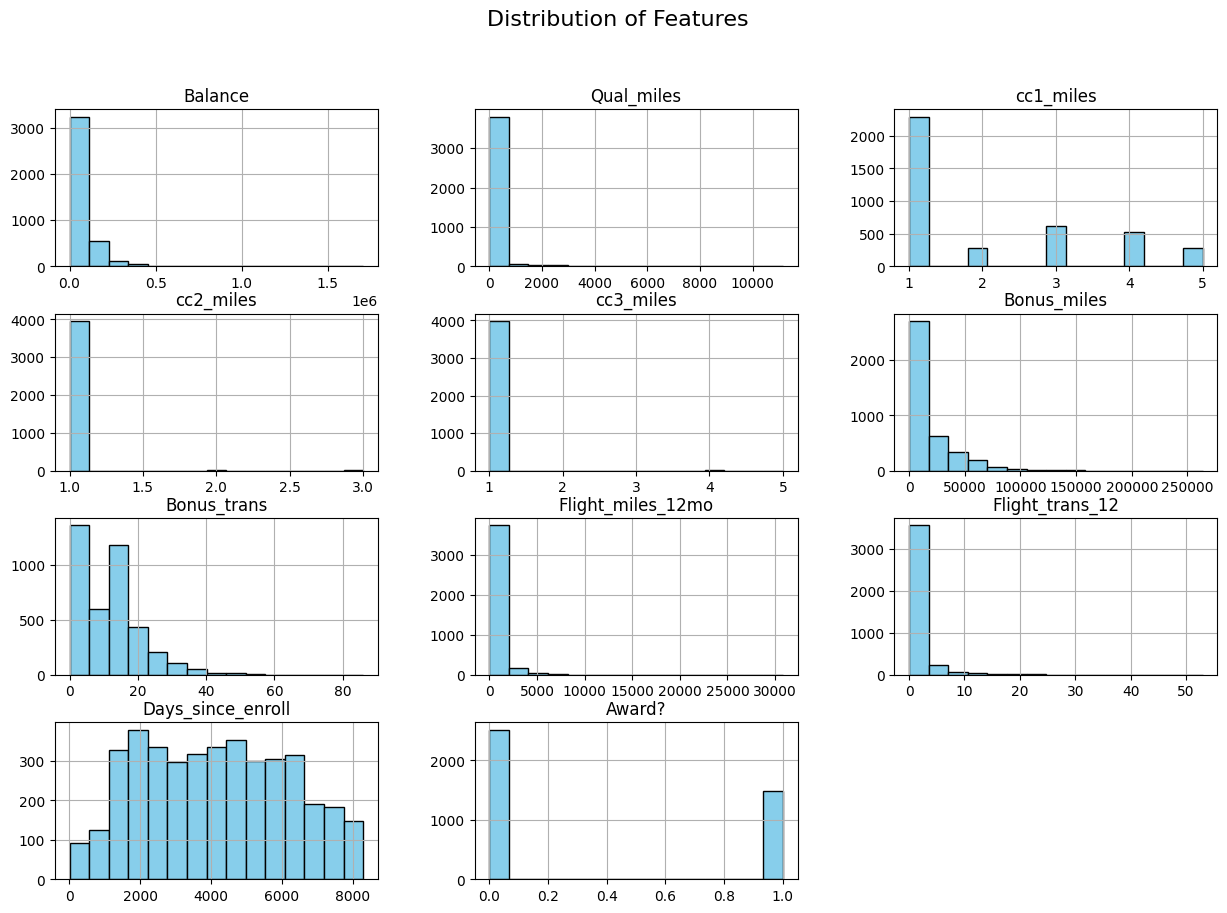

In [6]:
# plotting histograms for numeric varibles

import matplotlib.pyplot as plt
import seaborn as sns

df.drop(columns = ['ID#']).hist(bins = 15, figsize = (15,10), color = 'skyblue', edgecolor = 'black')
plt.suptitle('Distribution of Features', fontsize = 16)
plt.show()

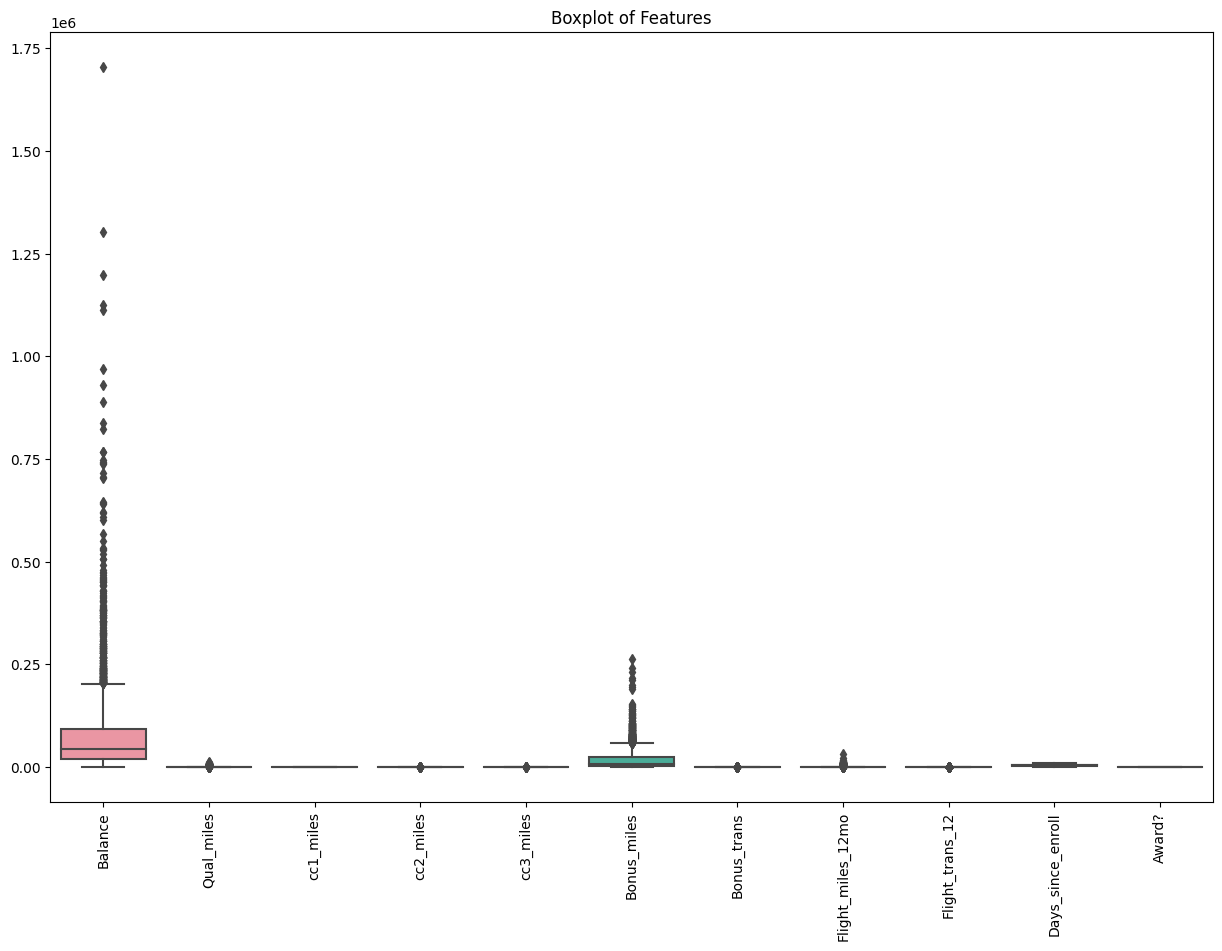

In [7]:
# constructing box plot for each feature

plt.figure(figsize = (15,10))
sns.boxplot(data = df.drop(columns = ['ID#']))
plt.title('Boxplot of Features')
plt.xticks(rotation = 90)
plt.show()

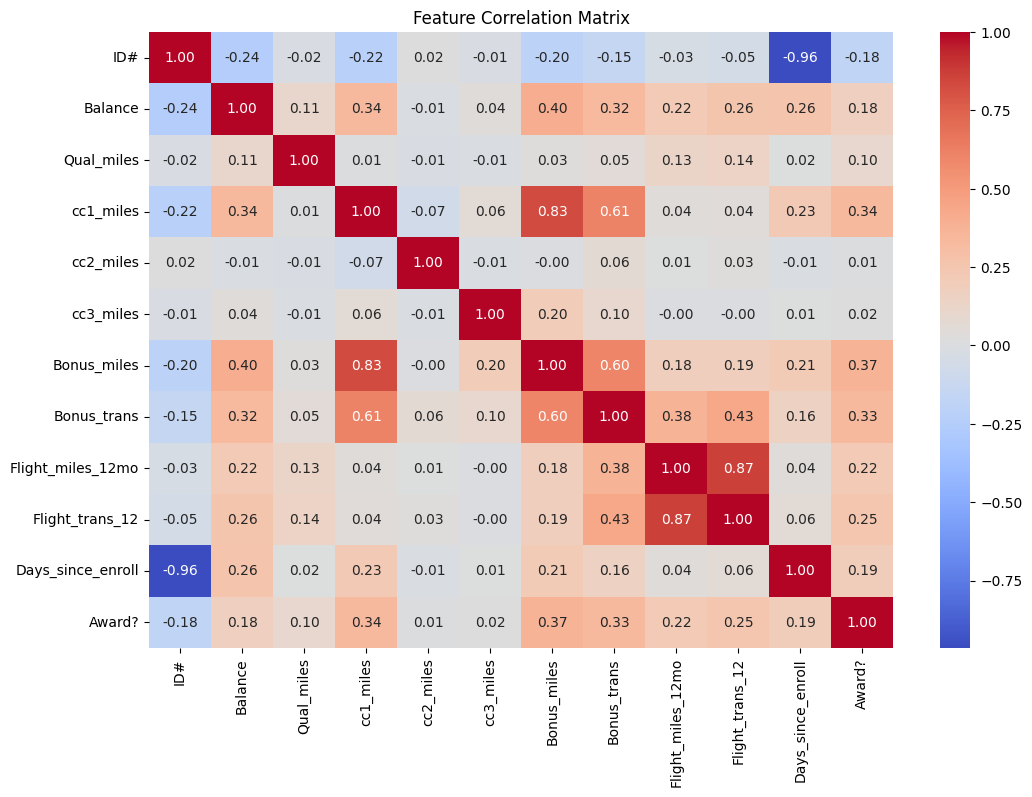

In [8]:
# computing correlation matrix

correlation_matrix = df.corr()

# plotting heatmap

plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Feature Correlation Matrix')
plt.show()

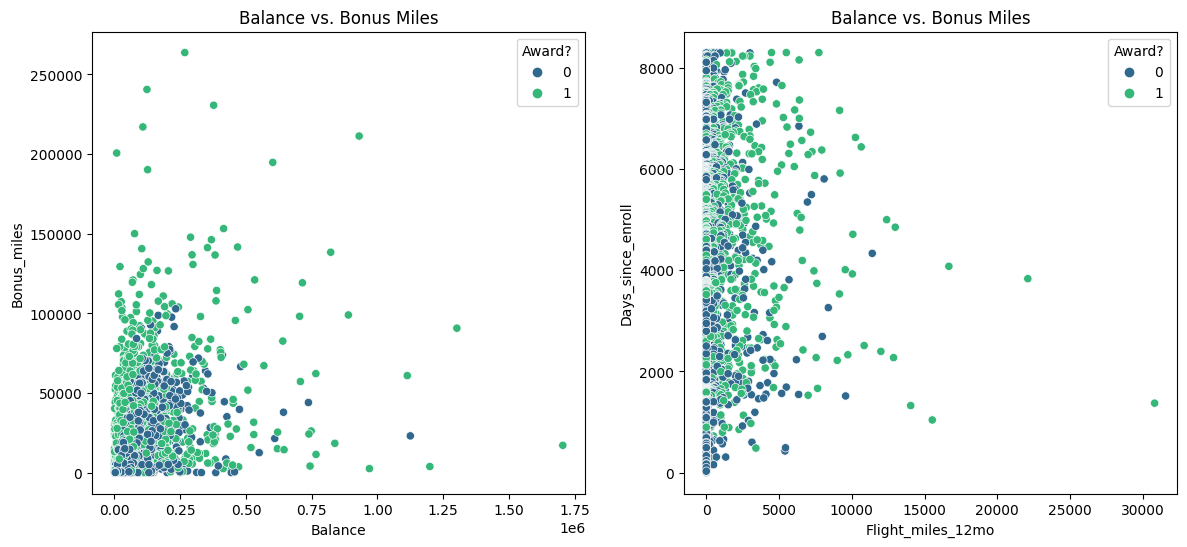

In [9]:
# constructing scatter plot to look for cluster patterns

plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.scatterplot(data = df, x = 'Balance', y = 'Bonus_miles', hue = 'Award?', palette = 'viridis')
plt.title('Balance vs. Bonus Miles')

plt.subplot(1,2,2)
sns.scatterplot(data = df, x = 'Flight_miles_12mo', y = 'Days_since_enroll', hue = 'Award?', palette = 'viridis')
plt.title('Balance vs. Bonus Miles')
plt.show()

In [11]:
# Data Transformation

# Standardization
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

df_scaling = SS.fit_transform(df)
df_scaling = pd.DataFrame(df_scaling)
df_scaling.columns = list(df)
df_scaling.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


# Implementing Clustering Algorithms:
•	Implement the K-Means, hierarchical, and DBSCAN algorithms using a programming language such as Python with libraries like scikit-learn or MATLAB.

•	Apply each clustering algorithm to the pre-processed dataset to identify clusters within the data.

•	Experiment with different parameter settings for hierarchical clustering (e.g., linkage criteria), K-means (Elbow curve for different K values) and DBSCAN (e.g., epsilon, minPts) and evaluate the clustering results.

# Cluster Analysis and Interpretation:
•	Analyse the clusters generated by each clustering algorithm and interpret the characteristics of each cluster. Write you insights in few comments.

# Visualization:
- Visualize the clustering results using scatter plots or other suitable visualization techniques.
- Plot the clusters with different colours to visualize the separation of data points belonging to different clusters.


# Evaluation and Performance Metrics:
- Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.

# Hierarchical Clustering

In [49]:
# linkage Criteria = single 

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, linkage = 'single')

df_scaling['Agg'] = cluster.fit_predict(df_scaling)
df_scaling

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Agg
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919,0
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919,0
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919,0
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919,0
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918,0
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918,0
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918,0
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919,0


In [45]:
Y = df_scaling['Agg']
Y

0       0
1       0
2       0
3       0
4       0
       ..
3994    0
3995    0
3996    0
3997    0
3998    0
Name: Agg, Length: 3999, dtype: int64

In [42]:
df_scaling['Agg'].value_counts()

Agg
0    3954
1      28
2      15
4       1
3       1
Name: count, dtype: int64

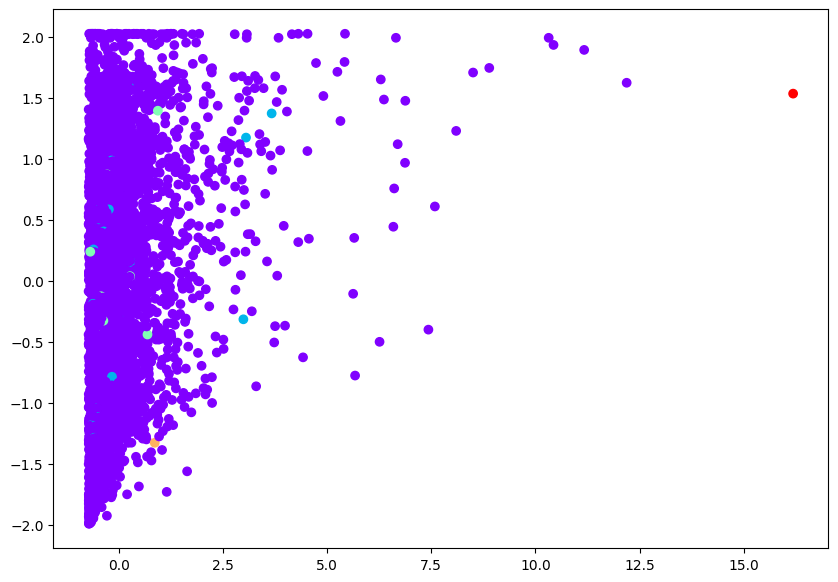

In [57]:
plt.figure(figsize = (10, 7))
plt.scatter(df_scaling.iloc[:,1], df_scaling.iloc[:,10], c = cluster.labels_, cmap = 'rainbow')

In [58]:
from sklearn.metrics import silhouette_score

In [62]:
singlelinkage_scores = []
for i in range(2,11):
    cluster = AgglomerativeClustering(n_clusters = i, linkage = 'single', metric = 'euclidean')
    cluster.fit_predict(df_scaling.iloc[:,1:12])
    singlelinkage_scores.append(silhouette_score(df_scaling.iloc[:,1:12], labels = cluster.labels_))
singlelinkage_scores

[0.8562820070415407,
 0.7350532148998382,
 0.5380065449865503,
 0.5378591358408883,
 0.5364116456429503,
 0.5372286905767694,
 0.53652881674395,
 0.5335253557401146,
 0.5419230857779356]

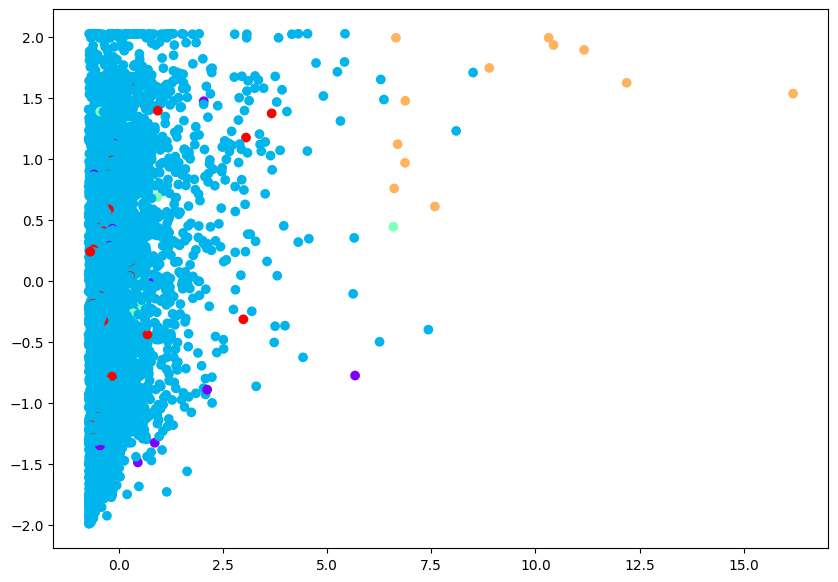

In [63]:
# linkage Criteria = complete 

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')

df_scaling['Agg'] = cluster.fit_predict(df_scaling)
Y = df_scaling['Agg']

plt.figure(figsize = (10, 7))
plt.scatter(df_scaling.iloc[:,1], df_scaling.iloc[:,10], c = cluster.labels_, cmap = 'rainbow')

In [67]:
completelinkage_scores = []
for i in range(2,11):
    cluster = AgglomerativeClustering(n_clusters = i, linkage = 'complete', metric = 'euclidean')
    cluster.fit_predict(df_scaling.iloc[:,1:12])
    completelinkage_scores.append(silhouette_score(df_scaling.iloc[:,1:12], labels = cluster.labels_))
completelinkage_scores

[0.8111134025692677,
 0.7760836053602842,
 0.5985727763092806,
 0.5625737661941762,
 0.5404241979396106,
 0.5418820074020084,
 0.5354664617626079,
 0.5313341704697034,
 0.41505057280945407]

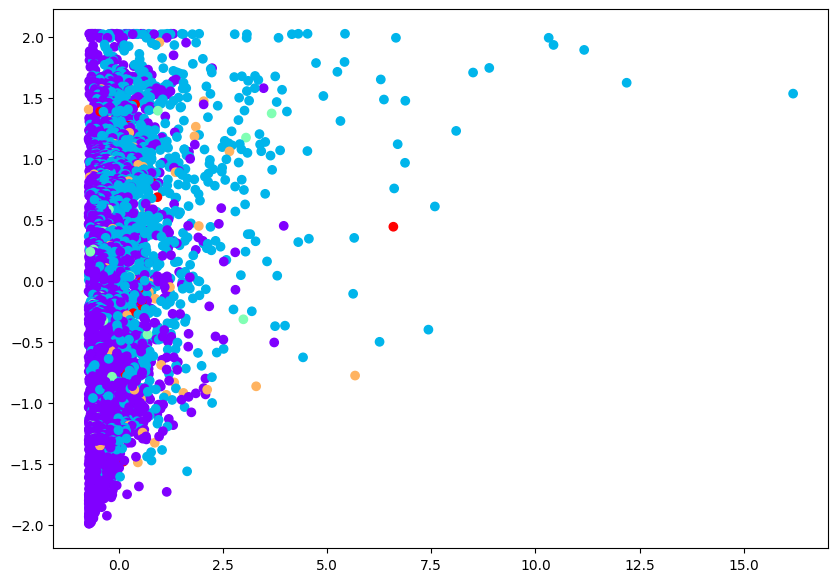

In [68]:
# linkage Criteria = ward 

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')

df_scaling['Agg'] = cluster.fit_predict(df_scaling)
Y = df_scaling['Agg']

plt.figure(figsize = (10, 7))
plt.scatter(df_scaling.iloc[:,1], df_scaling.iloc[:,10], c = cluster.labels_, cmap = 'rainbow')

In [69]:
wardlinkage_scores = []
for i in range(2,11):
    cluster = AgglomerativeClustering(n_clusters = i, linkage = 'ward', metric = 'euclidean')
    cluster.fit_predict(df_scaling.iloc[:,1:12])
    wardlinkage_scores.append(silhouette_score(df_scaling.iloc[:,1:12], labels = cluster.labels_))
wardlinkage_scores

[0.28926595242577247,
 0.2940432062008608,
 0.30814152852022786,
 0.3098805307874414,
 0.3192511970153055,
 0.18965334676868836,
 0.1890586470843928,
 0.1951894366329298,
 0.20121590768292186]

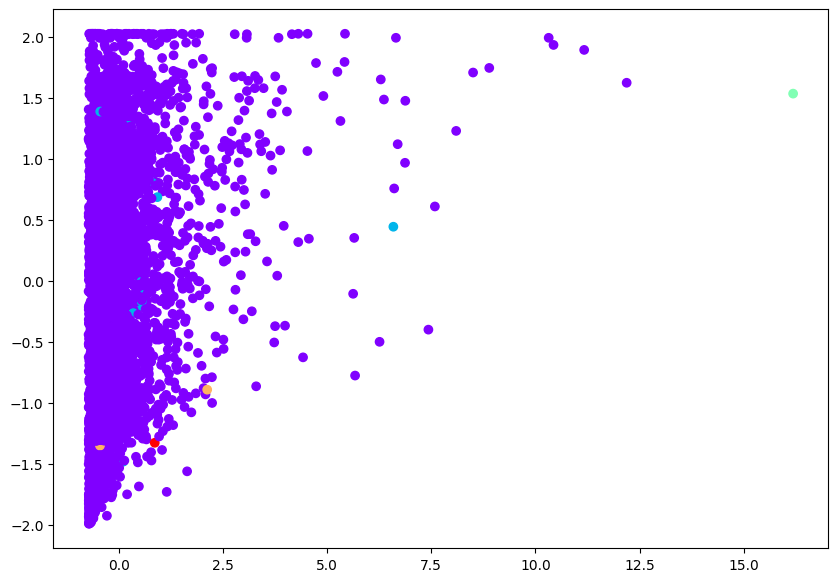

In [70]:
# linkage Criteria = average 

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, linkage = 'average')

df_scaling['Agg'] = cluster.fit_predict(df_scaling)
Y = df_scaling['Agg']

plt.figure(figsize = (10, 7))
plt.scatter(df_scaling.iloc[:,1], df_scaling.iloc[:,10], c = cluster.labels_, cmap = 'rainbow')

In [71]:
averagelinkage_scores = []
for i in range(2,11):
    cluster = AgglomerativeClustering(n_clusters = i, linkage = 'average', metric = 'euclidean')
    cluster.fit_predict(df_scaling.iloc[:,1:12])
    averagelinkage_scores.append(silhouette_score(df_scaling.iloc[:,1:12], labels = cluster.labels_))
averagelinkage_scores

[0.8111134025692677,
 0.7838667595062349,
 0.7731120442583631,
 0.7700180807329777,
 0.6618116714629186,
 0.6345583525022677,
 0.6205577093313711,
 0.6158172248186,
 0.5868062971255262]

# K-Means Clustering

In [12]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6, n_init = 20)

In [18]:
df['kmeans'] = kmeans.fit_predict(df_scaling.iloc[:,1:12])
df['kmeans'].value_counts()

kmeans
1    2473
2    1264
3     143
5      61
4      43
0      15
Name: count, dtype: int64

In [21]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_scaling.iloc[:,1:12])
    inertia.append(kmeans.inertia_)

In [22]:
inertia

[43989.000000000015,
 35409.51662986132,
 32895.91101443951,
 28909.479400430577,
 26975.7792330371,
 25599.26940287856,
 24433.62444554318,
 20713.2845647871,
 17306.440055842497,
 14732.229882347438]

In [19]:
from sklearn.metrics import silhouette_score

scores = []

for i in range(2,10):
    cluster  = KMeans(n_clusters = i, n_init = 20)
    df['kmeans'] = cluster.fit_predict(df_scaling.iloc[:,1:12])
    Y = df['kmeans']
    scores.append(silhouette_score(df_scaling.iloc[:,1:12], labels = cluster.labels_))

In [20]:
scores

[0.32542136327826215,
 0.31120106054803415,
 0.3079913268658421,
 0.32281647999806273,
 0.2788249563216679,
 0.28371332440773844,
 0.23679824274462632,
 0.2461606579609662]

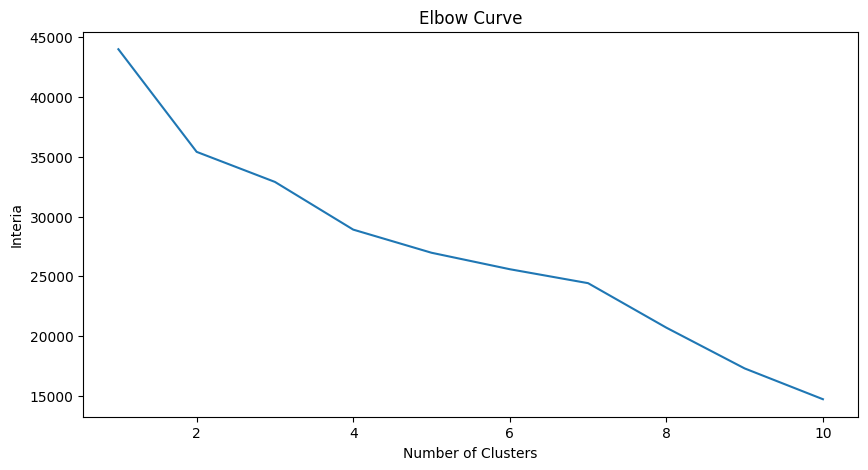

In [29]:
# plotting Elbow Curve

plt.figure(figsize = (10,5))
plt.plot(range(1,11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Interia')
plt.title('Elbow Curve')
plt.show()

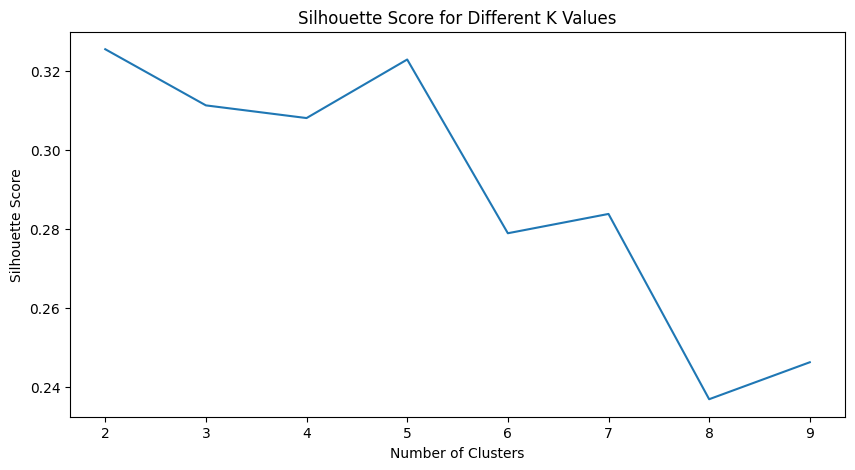

In [36]:
# Silhouette score plotting for each k

plt.figure(figsize=(10, 5))
plt.plot(range(2,10), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K Values")
plt.show()

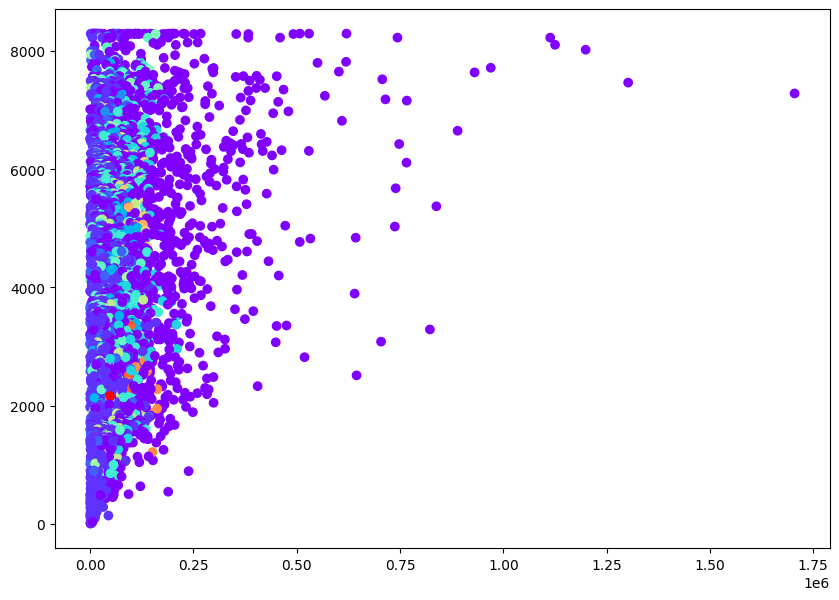

In [85]:
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,1], df.iloc[:,10], c=cluster.labels_ ,cmap='rainbow')

# DBSCAN

In [72]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 3, min_samples = 6)

In [73]:
dbscan.fit(df_scaling.iloc[:,1:12])

DBSCAN(eps=3, min_samples=6)

In [74]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

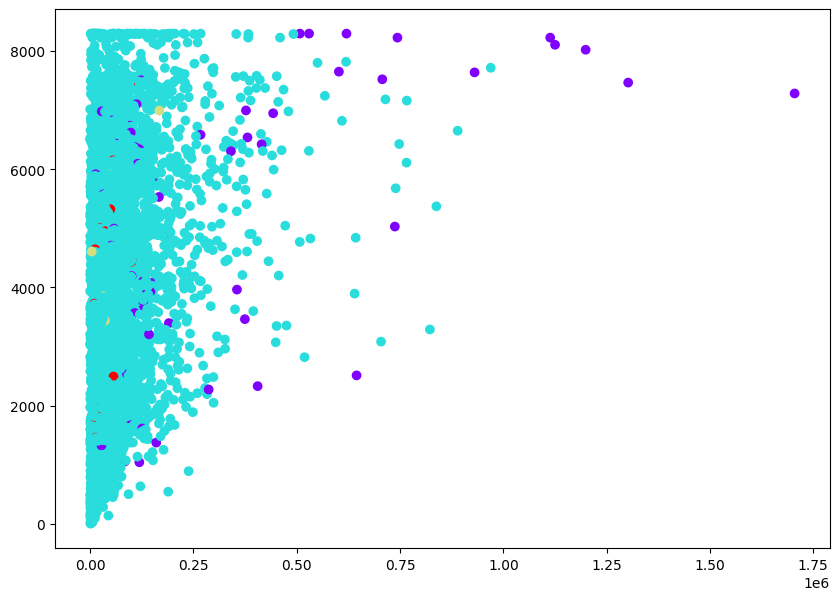

In [77]:
plt.figure(figsize=(10, 7))
plt.scatter(df.iloc[:,1], df.iloc[:,10], c=dbscan.labels_ ,cmap='rainbow')

In [82]:
from sklearn.metrics import silhouette_score

scores = []

for i in range(2,10):
    cluster  = DBSCAN()
    df['dbscan'] = cluster.fit_predict(df_scaling.iloc[:,1:12])
    Y = df['dbscan']
    scores.append(silhouette_score(df_scaling.iloc[:,1:12], labels = dbscan.labels_))
scores

[0.5423021447133288,
 0.5423021447133288,
 0.5423021447133288,
 0.5423021447133288,
 0.5423021447133288,
 0.5423021447133288,
 0.5423021447133288,
 0.5423021447133288]

. K-Means Clustering Interpretation
- Cluster 1: High Balance and Bonus_miles values, suggesting a group of high-value, loyal customers who frequently use their miles.
- Cluster 2: Lower Flight_miles_12mo, indicating possibly newer or less engaged customers who don’t travel as often.
- Cluster 3: Moderate values across most features, likely representing average customers with consistent but not exceptional engagement.

. Hierarchical Clustering Interpretation
- Cluster 1: High Bonus_trans values, likely representing frequent bonus-earning customers who may be drawn by promotions or special offers.
- Cluster 2: Higher Qual_miles and Flight_miles_12mo, suggesting frequent flyers who are active travelers and possibly loyal to the airline.
- Cluster 3: Lower across most features, potentially indicating less active or newer members with minimal engagement.

. DBSCAN Clustering Interpretation
- Cluster 1: High Days_since_enroll, representing long-term customers who have been with the airline for extended periods.
- Cluster 2: Higher values in credit card miles, indicating customers who accumulate miles primarily through credit card partnerships rather than direct flights.
- Noise Points (-1): Represent unique or outlier profiles, likely infrequent users or members with atypical activity patterns.